# **Movie Recommendation System**
****
**Group 12**
* Manu Krishna A - AM.EN.U4CSE19333
* Rahul P P - AM.EN.U4CSE19344
* Saran S Krishna - AM.EN.U4CSE19348
* Sidharth Sreehari - AM.EN.U4CSE19351
***
## **Problem Definition**

 Ever since the pandemic the consumption of movies and web series from various OTT platforms have increased by an excessive amount. The algorithms in these apps are accurate only to a small percentage. These algorithms are manipulated by the OTT platform to promote movies which are sponsored by them, so that they can get more views for it and make more money. There is a chance the recommendations might be good but there is a high chance the viewer won't like it. This problem motivated us in making an unadulterated recommendation system so that the viewer can have a better experience.




## **Dataset Used**

**IMDB DATASET**

This dataset is the collection of data's of top 1000 movies and TV shows. 

 Some of the features of this datasets is:

* Series_title
* Certificate
* Runtime
* Genre
* IMDB rating
* Overview



## **Python Packages Used :**

1. **Pandas** : Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

2. **NumPy** : NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

3. **Matplotlib** : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK

4. **Seaborn** : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

5. **Math** : The math module is a standard module in Python and is always available. To use mathematical functions under this module, you have to import the module using import math . It gives access to the underlying C library functions.

6. **Natural Language Toolkit** : NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

7. **Scikit-Learn** : Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon some of the technology you might already be familiar with, like NumPy, pandas, and Matplotlib.



## **Our Approach**
Our idea to solve the problem was to use natural language processing methods to find similar movies from the dataset upon getting an input movie.



> **NLP** : Natural language processing is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data

We start of by joining the contents from the movie overview, details of the cast and crew and created a movie information vector. Then the movie information vector is vectorized using TF-IDF Vectorizer.



> **TF-IDF** : term frequency–inverse document frequency.
 Captures the importance of a given word relative to other words in
the document and in the corpus.
* IDF : Inverse document frequency : measures the importance
of the term across a corpus.
* IDF : Inverse of DF : Total number of documents / Count of documents that has word w

After getting the TF-IDF vector we are appling Cosine similarity and Euclidean distance to find similar vectors and based on that we are printing out similar movies.

























In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/ml_project/

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/MyDrive/ml_project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
filename='imdb.csv'

data=pd.read_csv(filename)
df=data

## **Data Pre-Processing and Visualisation**

In [ ]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
del df['Poster_Link']
del df['Star3']
del df['Star4']
del df['Gross']
del df['Runtime']

In [ ]:
df.tail()

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,No_of_Votes
995,Breakfast at Tiffany's,1961,A,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,166544
996,Giant,1956,G,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,34075
997,From Here to Eternity,1953,Passed,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,43374
998,Lifeboat,1944,NaN,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,26471
999,The 39 Steps,1935,NaN,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,51853


**Data Summarizaion and Visualisation**

In [ ]:
print(df.shape)

(1000, 11)


In [ ]:
df.info

<bound method DataFrame.info of                  Series_Title Released_Year  ...              Star2 No_of_Votes
0    The Shawshank Redemption          1994  ...     Morgan Freeman     2343110
1               The Godfather          1972  ...          Al Pacino     1620367
2             The Dark Knight          2008  ...       Heath Ledger     2303232
3      The Godfather: Part II          1974  ...     Robert De Niro     1129952
4                12 Angry Men          1957  ...        Lee J. Cobb      689845
..                        ...           ...  ...                ...         ...
995    Breakfast at Tiffany's          1961  ...     George Peppard      166544
996                     Giant          1956  ...        Rock Hudson       34075
997     From Here to Eternity          1953  ...   Montgomery Clift       43374
998                  Lifeboat          1944  ...        John Hodiak       26471
999              The 39 Steps          1935  ...  Madeleine Carroll       51853

[1000 r

In [ ]:
print(df.dtypes)

Series_Title      object
Released_Year     object
Certificate       object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
No_of_Votes        int64
dtype: object


In [ ]:
top_voted = df.sort_values(['No_of_Votes'], ascending = False)

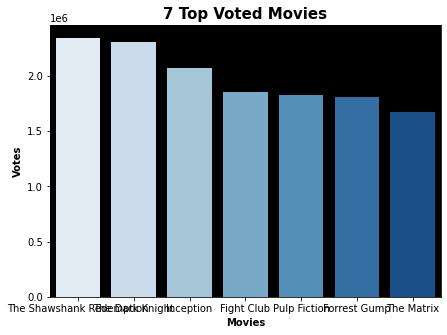

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))
ax.set(facecolor = 'Black')
sns.barplot(x=top_voted['Series_Title'][:7], y=top_voted['No_of_Votes'][:7], palette = 'Blues')
plt.title('7 Top Voted Movies', fontweight = 'bold', fontsize = 15)
plt.xlabel('Movies', fontsize = 10, fontweight = 'bold')
plt.ylabel('Votes', fontsize = 10, fontweight = 'bold')
plt.show()

In [ ]:
top_rated = df.sort_values(['IMDB_Rating'], ascending = False)

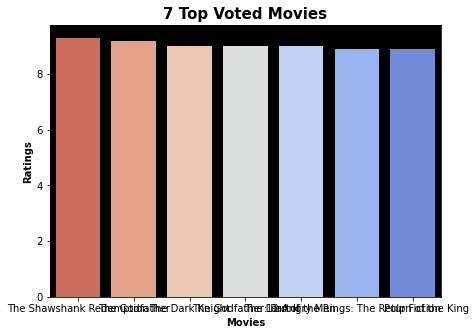

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))
ax.set(facecolor = 'Black')
sns.barplot(x=top_rated['Series_Title'][:7], y=top_rated['IMDB_Rating'][:7], palette = 'coolwarm_r')
plt.title('7 Top Voted Movies', fontweight = 'bold', fontsize = 15)
plt.xlabel('Movies', fontsize = 10, fontweight = 'bold')
plt.ylabel('Ratings', fontsize = 10, fontweight = 'bold')
plt.show()

**Data Preprocessing Using NLP Methods**

In [ ]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    st=" "
    for i in L1:
      st=st+i

    return st

In [ ]:
df['Director'] = df['Director'].apply(collapse)
df['Star1'] = df['Star1'].apply(collapse)
df['Star2'] = df['Star2'].apply(collapse)

In [ ]:
movie_data= df['Overview'] + df['Director'] + df['Star1'] + df['Star2']

In [ ]:
!pip install nltk

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import *
from nltk import sent_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess(t):

  #Txt to string
  st=""
  for i in t:
    st=st+i
  
  st=st.lower()

  #Word Tokenize
  w=word_tokenize(st)

  #stop word remove
  lsw =  stopwords.words("english")

  for i in w:
    if lsw.count(i)!=0:
      w.remove(i)

  #punctution and digit remove
  p=str(punctuation)

  pwl=[]
  for i in p:
    pwl.append(i)
  
  for i in w:
    if pwl.count(i)!=0 or i.isdigit()==1:
      w.remove(i)
  
  s=""
  for i in w:
    s=i+" "+s

  return s


In [ ]:
movie_info=[]
for i in movie_data :
  movie_info.append(preprocess(i))

In [ ]:
print(movie_info[0])

morganfreeman timrobbins frankdarabont decency common acts redemption eventual solace finding years number a bond men imprisoned two 


# **Implementation**

**TF-IDF Vectorizer to Vectorize the content**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidfvectorizer = TfidfVectorizer()  # create an object 
tfidfvectorizer = TfidfVectorizer(stop_words= 'english') # stopwords can be removal
tfidfvectorizer.fit(movie_info)            # build vocabulary


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
tfidfvectorizer.vocabulary_ 

{'morganfreeman': 4382,
 'timrobbins': 6609,
 'frankdarabont': 2437,
 'decency': 1588,
 'common': 1269,
 'acts': 118,
 'redemption': 5347,
 'eventual': 2135,
 'solace': 6090,
 'finding': 2337,
 'years': 7212,
 'number': 4610,
 'bond': 761,
 'men': 4204,
 'imprisoned': 3070,
 'alpacino': 269,
 'marlonbrando': 4073,
 'francisfordcoppola': 2431,
 'son': 6109,
 'reluctant': 5393,
 'empire': 2018,
 'clandestine': 1171,
 'control': 1351,
 'transfers': 6702,
 'patriarch': 4828,
 'aging': 181,
 'dynasty': 1889,
 'crime': 1425,
 'organized': 4702,
 'heathledger': 2823,
 'christianbale': 1127,
 'christophernolan': 1142,
 'injustice': 3137,
 'fight': 2318,
 'ability': 69,
 'tests': 6539,
 'physical': 4938,
 'psychological': 5178,
 'greatest': 2675,
 'accept': 87,
 'batman': 605,
 'gotham': 2648,
 'people': 4874,
 'chaos': 1052,
 'havoc': 2802,
 'wreaks': 7182,
 'joker': 3482,
 'known': 3663,
 'menace': 4205,
 'robertdeniro': 5574,
 'syndicate': 6420,
 'family': 2241,
 'grip': 2693,
 'tightens': 6

In [ ]:
tfidfvectorizer.get_feature_names()


['000',
 '007',
 '10',
 '100',
 '100th',
 '11',
 '12',
 '16',
 '16th',
 '17',
 '170',
 '1820s',
 '18th',
 '19',
 '1900s',
 '1917',
 '1920s',
 '1924',
 '1930s',
 '1940s',
 '1950',
 '1950s',
 '1960s',
 '1966',
 '1967',
 '1970s',
 '1971',
 '1972',
 '1976',
 '1979',
 '1980',
 '1980s',
 '1984',
 '1985',
 '1995',
 '20',
 '2006',
 '2007',
 '2013',
 '2018',
 '23',
 '24',
 '25',
 '27',
 '40',
 '59',
 '600',
 '60s',
 '60th',
 '65th',
 '6th',
 '70s',
 '78',
 '9000',
 'aamirkhan',
 'aaronsorkin',
 'aarontaylor',
 'abandoned',
 'abandons',
 'abbey',
 'abdellatifkechiche',
 'abducted',
 'abductions',
 'abductor',
 'aberration',
 'abhaydeol',
 'abhishekchaubey',
 'abhishekkapoor',
 'abilities',
 'ability',
 'abkhazia',
 'able',
 'abnormal',
 'aboard',
 'aboriginal',
 'abortion',
 'abrahamattah',
 'abrams',
 'abroad',
 'absence',
 'absorbed',
 'absurd',
 'abuse',
 'abusing',
 'abusive',
 'academic',
 'academy',
 'accept',
 'accepted',
 'accepts',
 'accident',
 'accidental',
 'accidentally',
 'acclaim'

In [ ]:
vectorized_text = tfidfvectorizer.transform(movie_info)  # vectorize the text data
vectorized_text.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data = vectorized_text.toarray()
tfidf_tokens = tfidfvectorizer.get_feature_names()

In [ ]:
df_tfidfvect = pd.DataFrame(data = data,columns = tfidf_tokens)

In [ ]:
df_tfidfvect

,000,007,10,100,100th,11,12,16,16th,17,170,1820s,18th,19,1900s,1917,1920s,1924,1930s,1940s,1950,1950s,1960s,1966,1967,1970s,1971,1972,1976,1979,1980,1980s,1984,1985,1995,20,2006,2007,2013,2018,...,yulbrynner,yuma,yun,yunlee,yuppie,yurikoishida,yutakasada,yvesmontand,yôjimatsuda,yôjirôtakita,zaara,zacharyquinto,zachgalifianakis,zackgottsagen,zacksnyder,zainalrafeea,zak,zare,zazaurushadze,zbigniewzamachowski,zealand,zealander,zero,zika,zodiac,zoesaldana,zombie,zombies,zone,zooeydeschanel,zorg,zoyaakhtar,zuckerberg,zulu,çaganirmak,çetintekindor,édith,érictoledano,ömerfaruksorak,özgeözberk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.246726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tflist= df_tfidfvect.values.tolist()

**Read a	search	Movie	from	the	user**

In [ ]:
movie_db=df.values

In [ ]:
print(movie_db[0])

['The Shawshank Redemption' '1994' 'A' 'Drama' 9.3
 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'
 80.0 ' FrankDarabont' ' TimRobbins' ' MorganFreeman' 2343110]


In [ ]:
t=input()

gandhi


In [ ]:
k=0

In [ ]:
for i in range(1000):
  if movie_db[i][0].lower()==t.lower():
    k=i
    
    

In [ ]:
print(k)

411


**Cosine Similarity**

In [ ]:
simval=[]
for i in range(1000):
  products = [a * b for a, b in zip(tflist[k],tflist[i])]
  ps=sum(products)

  sq1 = [a * b for a, b in zip(tflist[k],tflist[k])]
  s1 = sum(sq1)
  s1r = math.sqrt(s1)

  sq2 = [a * b for a, b in zip(tflist[i],tflist[i])]
  s2 = sum(sq2)
  s2r = math.sqrt(s2)

  if s1r==0 or s2r==0:
    cs = 0
  else:
    cs = ps / (s1r * s2r)

  info = []
  info.append(i)
  info.append(cs)
  simval.append(info)

In [ ]:
def takeSecond(elem):
    return elem[1]

**Result :**

In [ ]:
print("Top 5 similar Movies by Cosine Similarity :")
simval.sort(key=takeSecond,reverse=True)
for i in range(1,10):
  print("Movie Name :",movie_db[simval[i][0]][0])

Top 5 similar Movies by Cosine Similarity :
Movie Name : The Last of the Mohicans
Movie Name : Swades: We, the People
Movie Name : La planète sauvage
Movie Name : Wo hu cang long
Movie Name : Slumdog Millionaire
Movie Name : Lucky Number Slevin
Movie Name : Malcolm X
Movie Name : Cape Fear
Movie Name : A Clockwork Orange


**Euclidean	distance**

In [ ]:
infe=[]

In [ ]:
for i in range(1000):
  dif = [a - b for a, b in zip(tflist[k],tflist[i])]

  pro = [a * b for a, b in zip(dif,dif)]

  sm = sum(pro)

  ed = math.sqrt(sm)

  info = []
  info.append(i)
  info.append(ed)
  infe.append(info)

**Result :**

In [ ]:
print("Top 5 similar Movies by Euclidean Similarity :")
infe.sort(key=takeSecond)
for i in range(1,10):
  print("Movie Name :",movie_db[infe[i][0]][0])

Top 5 similar Movies by Euclidean Similarity :
Movie Name : The Last of the Mohicans
Movie Name : Swades: We, the People
Movie Name : La planète sauvage
Movie Name : Wo hu cang long
Movie Name : Slumdog Millionaire
Movie Name : Lucky Number Slevin
Movie Name : Malcolm X
Movie Name : Cape Fear
Movie Name : A Clockwork Orange


**Cosine Similarity - Built In**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(df_tfidfvect)
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.03591613],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03591613,
        1.        ]])

In [ ]:
def recommend(movie):
    for i in range(1000):
      if movie_db[i][0].lower()==movie.lower():
        k=i

    index = k
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    print("Top 5 similar Movies by Cosine Similarity :")
    for i in range(1,10):
      ind=distances[i][0]
      print("Movie Name :",movie_db[ind][0])
    
    return distances

**Result :**

In [295]:
recommend('The Dark Knight')

Top 5 similar Movies by Cosine Similarity :
Movie Name : Batman Begins
Movie Name : The Dark Knight Rises
Movie Name : The Prestige
Movie Name : Joker
Movie Name : Brokeback Mountain
Movie Name : Kill Bill: Vol. 1
Movie Name : La battaglia di Algeri
Movie Name : The Hurricane
Movie Name : Jaws


**App**

In [ ]:
ids=list(range(1, 1001))

In [ ]:
datax = {}
new = pd.DataFrame(datax)
new['id']=ids
new['title']=df['Series_Title'].values
new['data']=movie_info

In [ ]:
new.head()

,id,title,data
0,1,The Shawshank Redemption,morganfreeman timrobbins frankdarabont decency...
1,2,The Godfather,alpacino marlonbrando francisfordcoppola son r...
2,3,The Dark Knight,heathledger christianbale christophernolan inj...
3,4,The Godfather: Part II,robertdeniro alpacino francisfordcoppola syndi...
4,5,12 Angry Men,leej.cobb henryfonda sidneylumet evidence reco...
